$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Write your answer here:

$f(x)= $$[x_1,x_2]$ $ \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\quad $ x $ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\quad $ + 2[100,-25] $ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\quad $ + 10625






$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

Write your answer here:

$function  f:Rn→R  of the form  f(x)=x^⊤Ax+2b^⊤x+c , where  $A∈R^(nxn)$ is a symmetric matrix,  b∈R^n  and  c∈R$

so $\nabla$f(x) = 2AX + 2b where $ A∈R^(nxn) isasymmetricmatrix,b∈R^n and c∈R$

let f(x- α∇f(x)) = h(α) 
here h is the fuction of α.

so we have to minimize the h

$\frac{δh}{δα}$ = 0

$\frac{δh}{δα}$ = $[∇f(x-α∇f(x))]^T$ $[-∇f(x)]$

using fermats theorem

$[∇f(x-α∇f(x))]^T$ $[-∇f(x)]$ = 0

now taking transpose of above equation

$[-∇f(x)]^T$$[∇f(x-α∇f(x)]$ = 0

$[-∇f(x)]^T$$[2A(x -α∇f(x) + 2b]$ = 0

$[-∇f(x)]^T$$[2Ax -2Aα∇f(x) + 2b]$ = 0

$[∇f(x)]^T$ *A*x -$α*(∇f(x))^T$*A*$(∇f(x))$ + $(∇f(x))^T$*b = 0

α = $\frac{(∇f(x))^T*A*x + (∇f(x)^T*b}{((∇f(x)^T)*A*(∇f(x))}$

α = $\frac{(∇f(x))^T*(Ax +b)}{((∇f(x)^T)*A*(∇f(x))}$

α = $\frac{(∇f(x))^T*∇f(x)}{2((∇f(x)^T)*A*(∇f(x))}$

if $∇^2f(x)$ is greater than zero than we get minimum value.







We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [107]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [108]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [109]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [110]:
A = np.array([1,0,0,1]).reshape(2,2)
b = np.array([100,-25]).reshape(2,1)

In [111]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  #Complete the code
  num = np.dot(evalg(x).transpose(),evalg(x))
  den = 2*np.dot(np.dot(evalg(x).transpose(),A),evalg(x))
  step_length = num/den

  return step_length

In [112]:
def find_minimizer(start_x, tol):
  global k 
  
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


In [113]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)


(array([-100.,   25.]), 1)

In [114]:
tolerance_value = []
no_of_iteration = []
for i in range(1,11):
  my_start_x = np.array([10,10])
  my_tol = 10**(-i)
  print("tolerance value:",my_tol)
  tolerance_value.append(my_tol)
  minimizer,number_of_iterations=find_minimizer(my_start_x, my_tol)
  print('minimizer is:',minimizer)
  print('number_of_iterations',number_of_iterations)
  no_of_iteration.append(number_of_iterations)
  
  

print(tolerance_value)
print(no_of_iteration)




tolerance value: 0.1
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 0.01
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 0.001
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 0.0001
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-05
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-06
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-07
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-08
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-09
minimizer is: [-100.   25.]
number_of_iterations 1
tolerance value: 1e-10
minimizer is: [-100.   25.]
number_of_iterations 1
[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Text(0, 0.5, 'no_of_iterations')

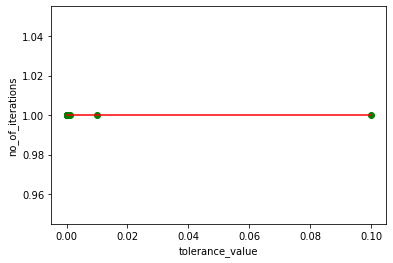

In [115]:
plt.plot(tolerance_value,no_of_iteration,color = "r")
plt.scatter(tolerance_value,no_of_iteration,color = "g")
plt.xlabel('tolerance_value')
plt.ylabel('no_of_iterations')


# obsevation
here the the tolerance value and no of iteration have constant fuction. but in excercise 1 it is decreasing.